Observed value at x=3:  1.3
Predicted value at x=3: 2.104652
Coefficients: Intercepts=0.275, Slope=0.610


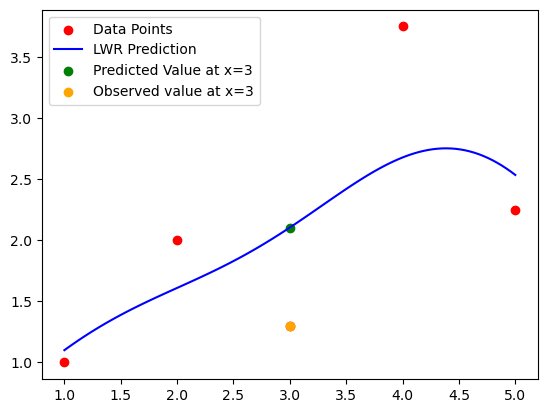

In [37]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array([1,2,3,4,5])
y=np.array([1,2,1.3,3.75,2.25])

def gaussian_weights(X_query,X,y,tau):
    return np.exp(-((X-X_query)**2)/(2*tau**2))

def lwr(X_query,X,y,tau):
    Weights=gaussian_weights(X_query,X,y,tau)
    W=np.diag(Weights)
    x_mat=np.vstack([np.ones_like(X),X]).T
    theta=np.linalg.pinv(x_mat.T @ W @x_mat) @(x_mat.T @W @y)
    return np.array([1,X_query]) @theta,theta

X_query=3
tau=1.0

y_pred,theta=lwr(X_query,X,y,tau)

print("Observed value at x=3: ",y[X==X_query][0])
print(f"Predicted value at x=3: {y_pred:3f}")
print(f"Coefficients: Intercepts={theta[0]:.3f}, Slope={theta[1]:.3f}")

x_vals=np.linspace(1,5,100)
y_vals=[lwr(x,X,y,tau)[0] for x in x_vals]

plt.scatter(X,y,color='red',label='Data Points')
plt.plot(x_vals,y_vals,color='blue',label='LWR Prediction')
plt.scatter(X_query,y_pred,color='green',label='Predicted Value at x=3')
plt.scatter(X_query,y[X==X_query][0],color='orange',label='Observed value at x=3')

plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Training data
X = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 1.3, 3.75, 2.25])

def gaussian_weights(x_query, X, tau):
    """Calculate Gaussian weights for each data point"""
    return np.exp(-((X - x_query) ** 2) / (2 * tau ** 2))

def locally_weighted_regression(x_query, X, y, tau):
    """Perform locally weighted regression at query point"""
    # Calculate weights
    weights = gaussian_weights(x_query, X, tau)
    W = np.diag(weights)
    
    # Create design matrix [1, x]
    X_matrix = np.vstack([np.ones_like(X), X]).T
    
    # Calculate weighted least squares solution
    theta = np.linalg.pinv(X_matrix.T @ W @ X_matrix) @ (X_matrix.T @ W @ y)
    
    # Predict at query point
    prediction = np.array([1, x_query]) @ theta
    
    return prediction, theta

# Query point and bandwidth parameter
x_query = 3
tau = 1.0

# Make prediction
y_pred, theta = locally_weighted_regression(x_query, X, y, tau)

# Print results
print("Observed value at x=3:", y[X == x_query][0])
print(f"Predicted value at x=3: {y_pred:.3f}")
print(f"Coefficients: Intercepts={theta[0]:.3f}, Slope={theta[1]:.3f}")

# Generate smooth curve for visualization
x_vals = np.linspace(1, 5, 100)
y_vals = [locally_weighted_regression(x, X, y, tau)[0] for x in x_vals]

# Plot results
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(x_vals, y_vals, color='blue', label='LWR Prediction')
plt.scatter(x_query, y_pred, color='green', label='Predicted Value at x=3')
plt.scatter(x_query, y[X == x_query][0], color='orange', label='Observed value at x=3')

plt.legend()
plt.show()

Observed value at x=3: 1.3
Predicted value at x=3: 2.105
Coefficients: Intercepts=0.275, Slope=0.610


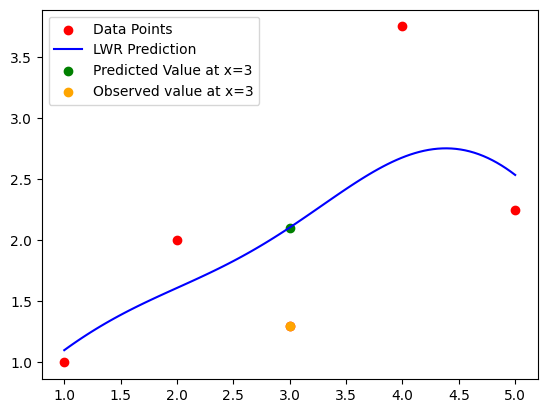

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Training data
X = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 1.3, 3.75, 2.25])

def lwr_sklearn(x_query, X, y, tau):
    """Locally weighted regression using sklearn"""
    # Calculate Gaussian weights
    weights = np.exp(-((X - x_query) ** 2) / (2 * tau ** 2))
    
    # Fit weighted linear regression
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y, sample_weight=weights)
    
    # Predict at query point
    prediction = model.predict([[x_query]])[0]
    
    return prediction, model.intercept_, model.coef_[0]

# Make prediction
x_query, tau = 3, 1.0
y_pred, intercept, slope = lwr_sklearn(x_query, X, y, tau)

# Print results
print("Observed value at x=3:", y[X == x_query][0])
print(f"Predicted value at x=3: {y_pred:.3f}")
print(f"Coefficients: Intercepts={intercept:.3f}, Slope={slope:.3f}")

# Plot results
x_vals = np.linspace(1, 5, 100)
y_vals = [lwr_sklearn(x, X, y, tau)[0] for x in x_vals]

plt.scatter(X, y, color='red', label='Data Points')
plt.plot(x_vals, y_vals, color='blue', label='LWR Prediction')
plt.scatter(x_query, y_pred, color='green', label='Predicted Value at x=3')
plt.scatter(x_query, y[X == x_query][0], color='orange', label='Observed value at x=3')
plt.legend()
plt.show()